In [2]:
from pyhdf.SD import SD, SDC
from scipy.io import netcdf
import matplotlib
import matplotlib.pyplot as plt
# import pyreadr
import numpy as np
import os
# import pprint
# import seaborn as sns; sns.set_theme()
import datetime
# from pyproj import Proj
import math
import collections
import Functions
import pandas as pd
from VPRM_offline.src.get_modis_point import get_modis_point

%run Functions.py

cwd = '/data/co2flux/common/mdomhoef/Oslo/Oslo_analysis/'
station_names = pd.read_csv('Oslo_analysis/VPRMoutput/All_years_stationnames.csv')
station_names = station_names['snames'].values.tolist()
year = 2018

In [3]:
MODISpath_old = cwd + 'data/MODIS_OSLO/'
stations, list_stations = get_stations_year(year)
stations.set_index(stations['Station'], inplace=True)
list_stations = ['FI-Hyy', 'FI-Let','SE-Ros', 'SE-Svb', 'SE-Htm', 'SE-Nor']

In [4]:
m_list = [  1,   9,  17,  25,  33,  41,  49,  57,  65,  73,  81,  89,  97,
       105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201,
       209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305,
       313, 321, 329, 337, 345, 353, 361]
n_list = []
d_list = []
for i in m_list:
    number = 18000+i
    string = str(number)
    date = datetime.datetime.strptime(string, '%y%j').date()
    date = pd.to_datetime(date)

    # date = date.strftime('%d/%m/%Y')
    n_list.append(date)    

In [5]:
#Load the Modis 09 data for each station 2018
df_old_evi = pd.DataFrame()
df_old_lswi = pd.DataFrame()

for sitename in list_stations: 
    lon = stations.loc[sitename, 'Longitude']
    lat = stations.loc[sitename, 'Latitude']
    tile = [stations.loc[sitename, 'tile_h'], stations.loc[sitename, 'tile_v']]
    #get evi of old modis 
    data = get_modis_point(year=year, lat = lat, lon = lon, tile = tile, MODISpath = MODISpath_old, sitename = sitename)
    evi_old = data[1] 
    lswi_old = data[2]
    df_old_evi[sitename + '_EVI'] = evi_old
    df_old_lswi[sitename + '_LSWI'] = lswi_old

[61.84166667] [24.29166667]
[60.64166667] [23.95833333]
[64.16666667] [19.73333333]
[64.25] [19.76666667]
[56.09166667] [13.41666667]
[60.08333333] [17.475]


In [6]:
df_old_evi.index = n_list 
df_old_evi

,FI-Hyy_EVI,FI-Let_EVI,SE-Ros_EVI,SE-Svb_EVI,SE-Htm_EVI,SE-Nor_EVI
2018-01-01,0.573698,NaN,NaN,NaN,0.231445,0.363961
2018-01-09,0.347522,NaN,NaN,NaN,0.170422,0.312094
2018-01-17,0.282956,NaN,NaN,NaN,0.171351,0.277431
2018-01-25,0.218390,NaN,NaN,0.009935,0.244531,0.242769
2018-02-02,0.153825,NaN,NaN,0.097466,0.313814,0.208106
2018-02-10,0.089259,NaN,NaN,0.184996,0.311146,0.173444
2018-02-18,0.168573,NaN,NaN,0.222822,0.285865,0.173478
2018-02-26,0.247886,NaN,NaN,0.260648,0.273972,0.173513
2018-03-06,0.327200,NaN,NaN,0.298474,0.252446,0.173547
2018-03-14,0.315508,NaN,NaN,0.336300,0.230920,0.200122


In [7]:
df_old_lswi.index = n_list 
df_old_lswi.columns = ['FI-Hyy_LSWI','FI-Let_LSWI','SE-Ros_LSWI','SE-Svb_LSWI','SE-Htm_LSWI','SE-Nor_LSWI']

In [8]:
#Load the Modis 13 data for each station year 

modis_dir = file_path = cwd + 'data/MODIS/2018_h18_v02/'

df_182, l_182 = get_stations_tile_year(2018, 18,2)    
index = [forward_mapping(*coords) for coords in [deg_to_rad(*item) for item in df_182[['Latitude', 'Longitude']].values.tolist()]]

dirListing = os.listdir(modis_dir)
dirListing.sort()

evi_dict = {}

for file in dirListing: 
    date = str.split(file, sep = ".")[1]
    title = datetime.datetime.strptime(date[3:], '%y%j').date()    
    file_path = modis_dir
    data = get_modis_layer(file, file_path) 
    # evi = data[(1956, 350)]#/scale_factor
    evi = [data[x] for x in index]
    evi_dict[str(title)] = evi
od = collections.OrderedDict(sorted(evi_dict.items()))
modis13_182 =  pd.DataFrame.from_dict(od, orient='index', columns = l_182)

In [9]:
modis_dir = file_path = cwd + 'data/MODIS/2018_h18_v03/'

df_183, l_183 = get_stations_tile_year(2018, 18,3)    
index = [forward_mapping(*coords) for coords in [deg_to_rad(*item) for item in df_183[['Latitude', 'Longitude']].values.tolist()]]

dirListing = os.listdir(modis_dir)
dirListing.sort()

evi_dict_18_3 = {}

for file in dirListing: 
    date = str.split(file, sep = ".")[1]
    title = datetime.datetime.strptime(date[3:], '%y%j').date()    
    file_path = modis_dir
    data = get_modis_layer(file, file_path) 
    # evi = data[(1956, 350)]#/scale_factor
    evi = [data[x] for x in index]
    evi_dict_18_3[str(title)] = evi
od = collections.OrderedDict(sorted(evi_dict_18_3.items()))
modis13_183 =  pd.DataFrame.from_dict(od, orient='index', columns = l_183)

In [10]:
modis_dir = file_path = cwd + 'data/MODIS/2018_h19_v02/'

df_192, l_192 = get_stations_tile_year(2018, 19,2)    
index = [forward_mapping(*coords) for coords in [deg_to_rad(*item) for item in df_192[['Latitude', 'Longitude']].values.tolist()]]

dirListing = os.listdir(modis_dir)
dirListing.sort()

evi_dict_19_2 = {}

for file in dirListing: 
    date = str.split(file, sep = ".")[1]
    title = datetime.datetime.strptime(date[3:], '%y%j').date()    
    file_path = modis_dir
    data = get_modis_layer(file, file_path) 
    # evi = data[(1956, 350)]#/scale_factor
    evi = [data[x] for x in index]
    evi_dict_19_2[str(title)] = evi
od = collections.OrderedDict(sorted(evi_dict_18_3.items()))
modis13_192 = pd.DataFrame.from_dict(od, orient='index', columns = l_192)

In [11]:
modis13 = pd.concat([modis13_182,modis13_183,modis13_192], axis = 1) 
modis13 = modis13.drop(['SE-Deg', 'SE-Lnn'], axis = 1)
modis13

,SE-Ros,SE-Svb,SE-Nor,SE-Htm,FI-Hyy,FI-Let
2017-12-19,NaN,NaN,0.2709,0.2143,0.1427,0.2143
2018-01-01,NaN,NaN,0.3083,0.3143,0.1427,0.3143
2018-01-17,0.0296,0.1480,0.3084,0.2778,0.1751,0.2778
2018-02-02,0.0595,0.0586,0.1578,0.3427,0.0171,0.3427
2018-02-18,0.1770,0.1031,0.1524,0.2596,-0.0092,0.2596
2018-03-06,0.1708,0.2103,0.1766,0.3597,0.1160,0.3597
2018-03-22,0.1315,0.1824,0.2076,0.2738,0.1185,0.2738
2018-04-07,0.1086,0.1790,0.2553,0.2732,0.2186,0.2732
2018-04-23,0.2658,0.2072,0.2626,0.3473,0.2355,0.3473
2018-05-09,0.2154,0.2752,0.3050,0.3849,0.4143,0.3849


In [12]:
# NO LSWI cause no sir 
modis13_lswi = modis13.copy()
# modis13_lswi = np.nan
modis13_lswi.iloc[:] = np.nan
modis13_lswi

,SE-Ros,SE-Svb,SE-Nor,SE-Htm,FI-Hyy,FI-Let
2017-12-19,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-17,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-18,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-06,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-07,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-23,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Load the Sentinel 2 data for each station year 


In [14]:
path_sentinel = '/data/co2flux/common/mdomhoef/Oslo/Oslo_analysis/data/Google_EVI_LSWI/'


In [15]:
df_sen_evi = pd.DataFrame()
names =[]
for station in list_stations:
    evi_df = pd.read_csv(path_sentinel + 'EVI_'+ station+'.csv')
    evi_df['Datetime'] = pd.to_datetime(evi_df['system:time_start'], format= '%b %d, %Y')
    evi_df['year'] = evi_df['Datetime'].dt.year
    evi_df = evi_df[evi_df.year == 2018] #.reset_index()
    EVI= []
    for i, row in evi_df.iterrows():
        try:
            evi = float(row['constant_mean'])

        except :
            evi = np.nan

        EVI.append(evi)
    evi_df['EVI_mean'] = EVI
    evi_df.loc[evi_df['EVI_mean'] > 1, 'EVI_mean'] = np.nan
    evi_df.loc[evi_df['EVI_mean'] < 0, 'EVI_mean'] = np.nan
    evi_df.dropna(subset=['EVI_mean'], inplace = True)

    evi_df = evi_df.drop_duplicates(subset=['Datetime'],keep= 'first')
    evi_df = evi_df.reset_index()
    # print(len(evi_df))
    df_sen_evi = pd.concat([df_sen_evi,evi_df['EVI_mean'], evi_df['Datetime']], ignore_index=True, axis=1)
    names.append('EVI_'+station)
    names.append('Date_'+station)

In [16]:
df_sen_evi.columns = names
df_sen_evi.tail()

,EVI_FI-Hyy,Date_FI-Hyy,EVI_FI-Let,Date_FI-Let,EVI_SE-Ros,Date_SE-Ros,EVI_SE-Svb,Date_SE-Svb,EVI_SE-Htm,Date_SE-Htm,EVI_SE-Nor,Date_SE-Nor
81,NaN,NaT,NaN,NaT,0.125,2018-10-27,0.286,2018-11-01,NaN,NaT,NaN,NaT
82,NaN,NaT,NaN,NaT,0.180,2018-10-29,0.287,2018-11-03,NaN,NaT,NaN,NaT
83,NaN,NaT,NaN,NaT,0.255,2018-11-01,0.287,2018-11-05,NaN,NaT,NaN,NaT
84,NaN,NaT,NaN,NaT,0.260,2018-11-03,NaN,NaT,NaN,NaT,NaN,NaT
85,NaN,NaT,NaN,NaT,0.261,2018-11-05,NaN,NaT,NaN,NaT,NaN,NaT


In [17]:
df_sen_lswi = pd.DataFrame()
names =[]
for station in list_stations:
    lswi_df = pd.read_csv(path_sentinel + 'LSWI_'+ station+'.csv')
    lswi_df['Datetime'] = pd.to_datetime(lswi_df['system:time_start'], format= '%b %d, %Y')
    lswi_df['year'] = lswi_df['Datetime'].dt.year
    lswi_df = lswi_df[lswi_df.year == 2018] #.reset_index()
    LSWI= []
    for i, row in lswi_df.iterrows():
        try:
            lswi = float(row['nd_mean'])

        except :
            lswi = np.nan

        LSWI.append(lswi)

    lswi_df['LSWI_mean'] = LSWI
    lswi_df.loc[lswi_df['LSWI_mean'] > 1, 'LSWI_mean'] = np.nan
    lswi_df.loc[lswi_df['LSWI_mean'] < -1, 'LSWI_mean'] = np.nan
    lswi_df.dropna(subset=['LSWI_mean'], inplace = True)
    lswi_df = lswi_df.drop_duplicates(subset=['Datetime'],keep= 'first')
    lswi_df = lswi_df.reset_index()
    print(len(lswi_df))
    df_sen_lswi = pd.concat([df_sen_lswi,lswi_df['LSWI_mean'], lswi_df['Datetime']], ignore_index=True, axis=1)
    names.append('LSWI_'+station)
    names.append('Date_'+station)

61
63
89
86
71
62


In [18]:
df_sen_lswi.columns = names
df_sen_lswi.tail()

,LSWI_FI-Hyy,Date_FI-Hyy,LSWI_FI-Let,Date_FI-Let,LSWI_SE-Ros,Date_SE-Ros,LSWI_SE-Svb,Date_SE-Svb,LSWI_SE-Htm,Date_SE-Htm,LSWI_SE-Nor,Date_SE-Nor
84,NaN,NaT,NaN,NaT,0.190,2018-10-27,0.444,2018-11-03,NaN,NaT,NaN,NaT
85,NaN,NaT,NaN,NaT,0.150,2018-10-29,0.418,2018-11-05,NaN,NaT,NaN,NaT
86,NaN,NaT,NaN,NaT,0.346,2018-11-01,NaN,NaT,NaN,NaT,NaN,NaT
87,NaN,NaT,NaN,NaT,0.362,2018-11-03,NaN,NaT,NaN,NaT,NaN,NaT
88,NaN,NaT,NaN,NaT,0.332,2018-11-05,NaN,NaT,NaN,NaT,NaN,NaT


## Plot EVI

In [19]:
m09 = df_old_evi['FI-Hyy_EVI']
m09 = m09.dropna()

In [20]:
s02 = df_sen_evi[['EVI_FI-Hyy', 'Date_FI-Hyy']]
s02 = s02[pd.notnull(s02)]
s02.set_index('Date_FI-Hyy', inplace = True)
s02.index = pd.to_datetime(s02.index)
s02 = s02.dropna()


In [21]:
m13 = modis13['FI-Hyy']
m13.index = pd.to_datetime(m13.index)

In [22]:
c = pd.DataFrame(m13).join([pd.DataFrame(m09), pd.DataFrame(s02)], how='outer')
c.head(20)
c.columns = ["m13_FI-Hyy_EVI","m09_FI-Hyy_EVI","s02_FI-Hyy_EVI"]
c

,m13_FI-Hyy_EVI,m09_FI-Hyy_EVI,s02_FI-Hyy_EVI
2017-12-19,0.1427,NaN,NaN
2018-01-01,0.1427,0.573698,NaN
2018-01-09,NaN,0.347522,NaN
2018-01-17,0.1751,0.282956,NaN
2018-01-23,NaN,NaN,0.229
...,...,...,...
2018-11-17,0.2454,0.264118,0.347
2018-11-19,NaN,NaN,0.284
2018-11-25,NaN,0.290820,NaN
2018-12-03,0.3554,0.279253,NaN


<AxesSubplot:>

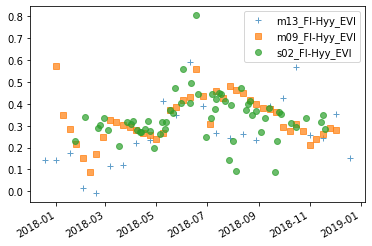

In [23]:
c.plot(style=['+','s','o'],alpha = 0.7)

In [67]:
d = c.count()


0

/nfs/pic.es/user/m/mdomhoef/.conda/envs/env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/nfs/pic.es/user/m/mdomhoef/.conda/envs/env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/nfs/pic.es/user/m/mdomhoef/.conda/envs/env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/nfs/pic.es/user/m/mdomhoef/.co

Text(0.5, 0.98, 'EVI of different satellite sources, all stations, 2018')

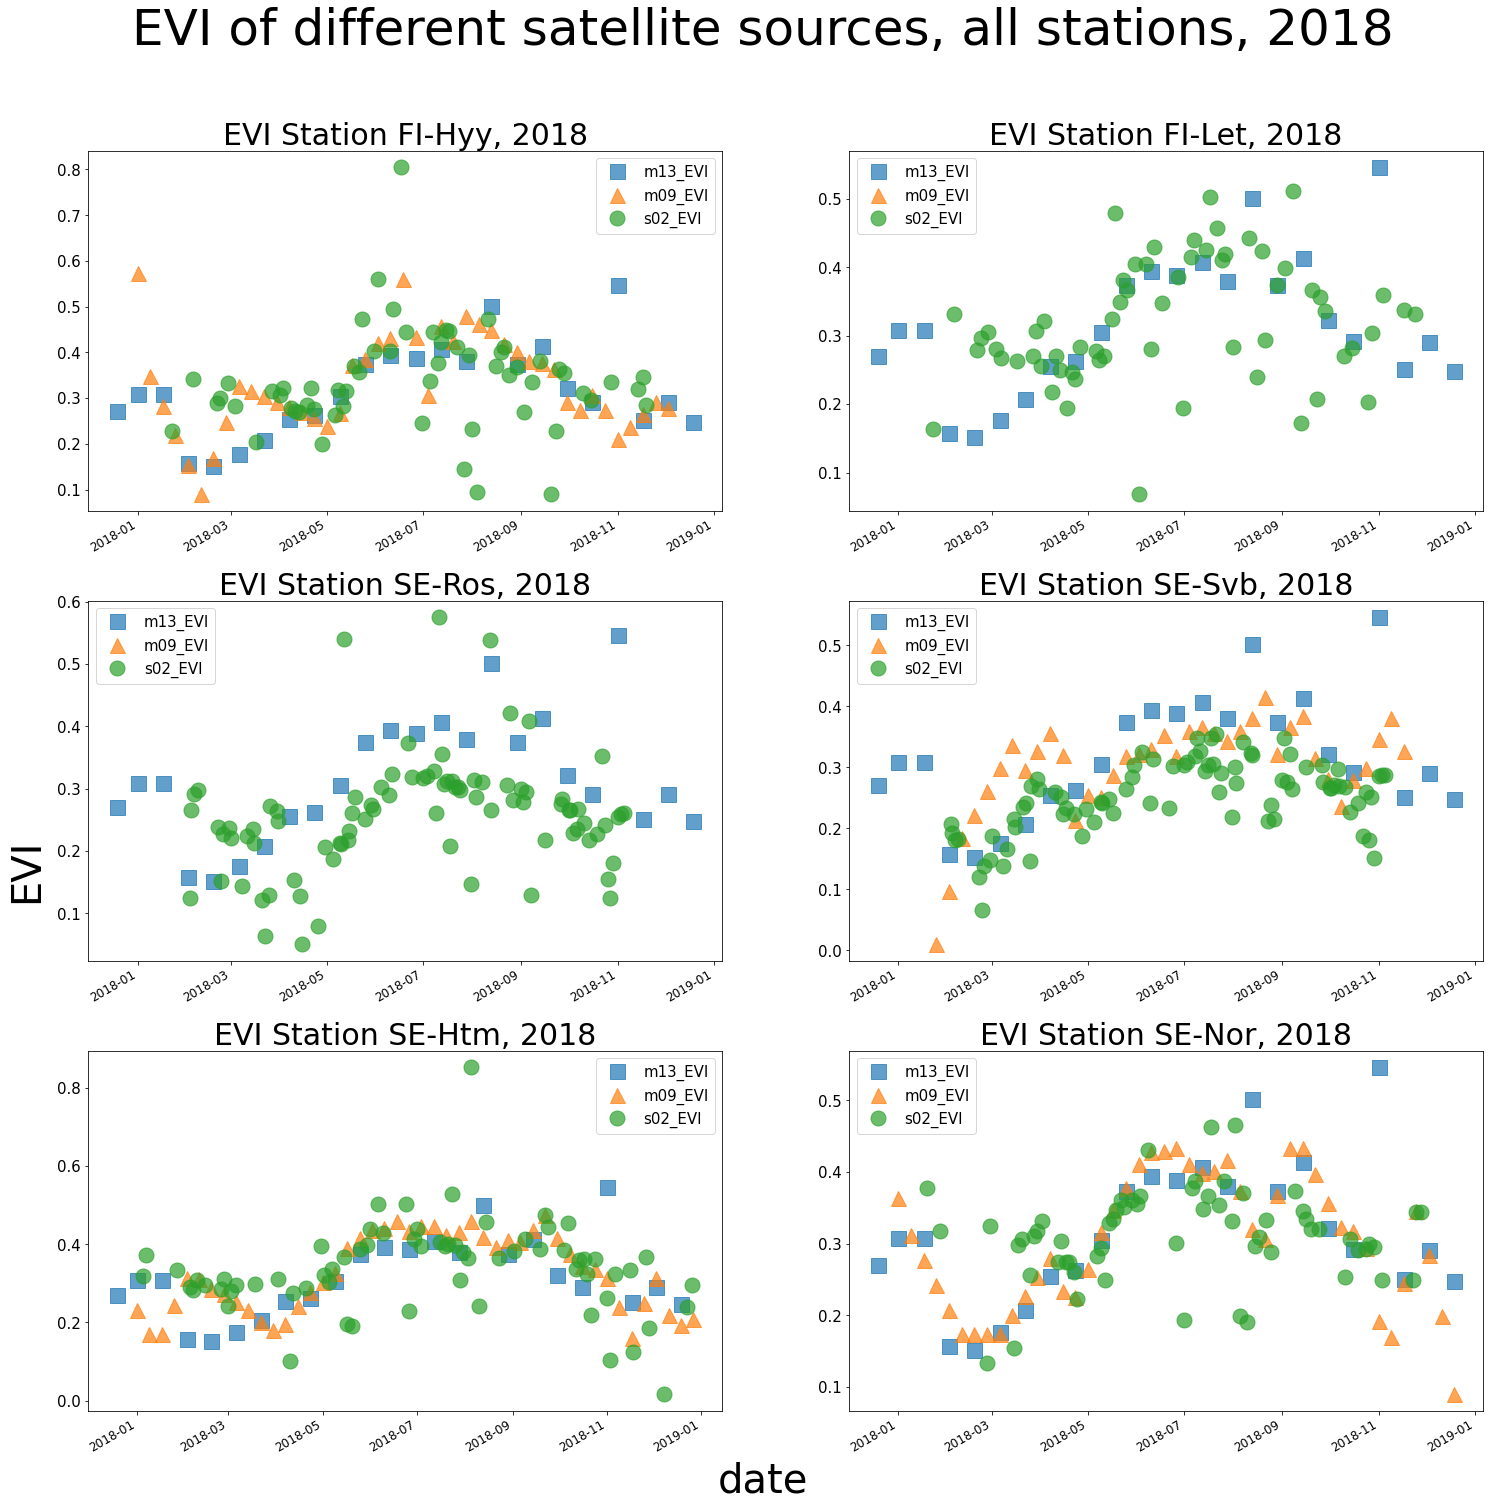

In [87]:
# fig, axs = plt.subplots(int(len(list_stations)), figsize = (40,50))
counts = pd.DataFrame(columns = list_stations) 
fig, axes = plt.subplots(int(len(list_stations)/2), 2, figsize = (25,25))#, sharex=True, sharey=True)

# df1.plot(ax=axes[0])
# df2.plot(ax=axes[0,1])

for i, ax in enumerate(axes.flat):
    m09 = df_old_evi[list_stations[i]+'_EVI']
    m09 = m09.dropna()
    s02 = df_sen_evi[['EVI_'+list_stations[i], 'Date_'+list_stations[i]]]
    s02 = s02[pd.notnull(s02)]
    s02.set_index('Date_'+list_stations[i], inplace = True)
    s02.index = pd.to_datetime(s02.index)
    s02 = s02.dropna()
    m13 = modis13[station]
    m13.index = pd.to_datetime(m13.index)
    c = pd.DataFrame(m13).join([pd.DataFrame(m09), pd.DataFrame(s02)], how='outer')
    c.columns = ["m13_EVI","m09_EVI","s02_EVI"]
    
    d = c.count()
    counts[list_stations[i]] = d
    c.plot(style=['s','^','o'],alpha = 0.7, ms=15, ax = ax)
    
    
    ax.legend(fontsize = 15)

    ax.set_title(f'EVI Station {list_stations[i]}, 2018', fontsize=30 )
    
    ax.tick_params(labelsize = 15)
    
    # ax.set_xticklabels(fontsize=12)
    
    plt.setp(ax.get_xticklabels(), fontsize=12)
# # common axis labels
fig.supxlabel('date', fontsize = 40, x = 0.5, y=0.15)
fig.supylabel('EVI', fontsize = 40, x = 0.08, y=0.5) 

# # set labels
# plt.setp(axs[0:2], xlabel='x axis label')
# plt.setp(axs[3:5], ylabel='y axis label')
    
fig.subplots_adjust(top=0.9, hspace=0.25)
fig.suptitle("EVI of different satellite sources, all stations, 2018", fontsize=50)
    
    

In [72]:
counts

,FI-Hyy,FI-Let,SE-Ros,SE-Svb,SE-Htm,SE-Nor
m13_EVI,24,24,24,24,24,24
m09_EVI,43,0,0,38,46,45
s02_EVI,61,62,86,84,69,62


In [56]:
'2018-12-27'
df_old_lswi.min()

FI-Hyy_LSWI    0.111964
FI-Let_LSWI         NaN
SE-Ros_LSWI         NaN
SE-Svb_LSWI    0.192100
SE-Htm_LSWI    0.076233
SE-Nor_LSWI    0.144963
dtype: float64

/nfs/pic.es/user/m/mdomhoef/.conda/envs/env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/nfs/pic.es/user/m/mdomhoef/.conda/envs/env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/nfs/pic.es/user/m/mdomhoef/.conda/envs/env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/nfs/pic.es/user/m/mdomhoef/.co

Text(0.5, 0.98, 'LSWI of different satellite sources, all stations, 2018')

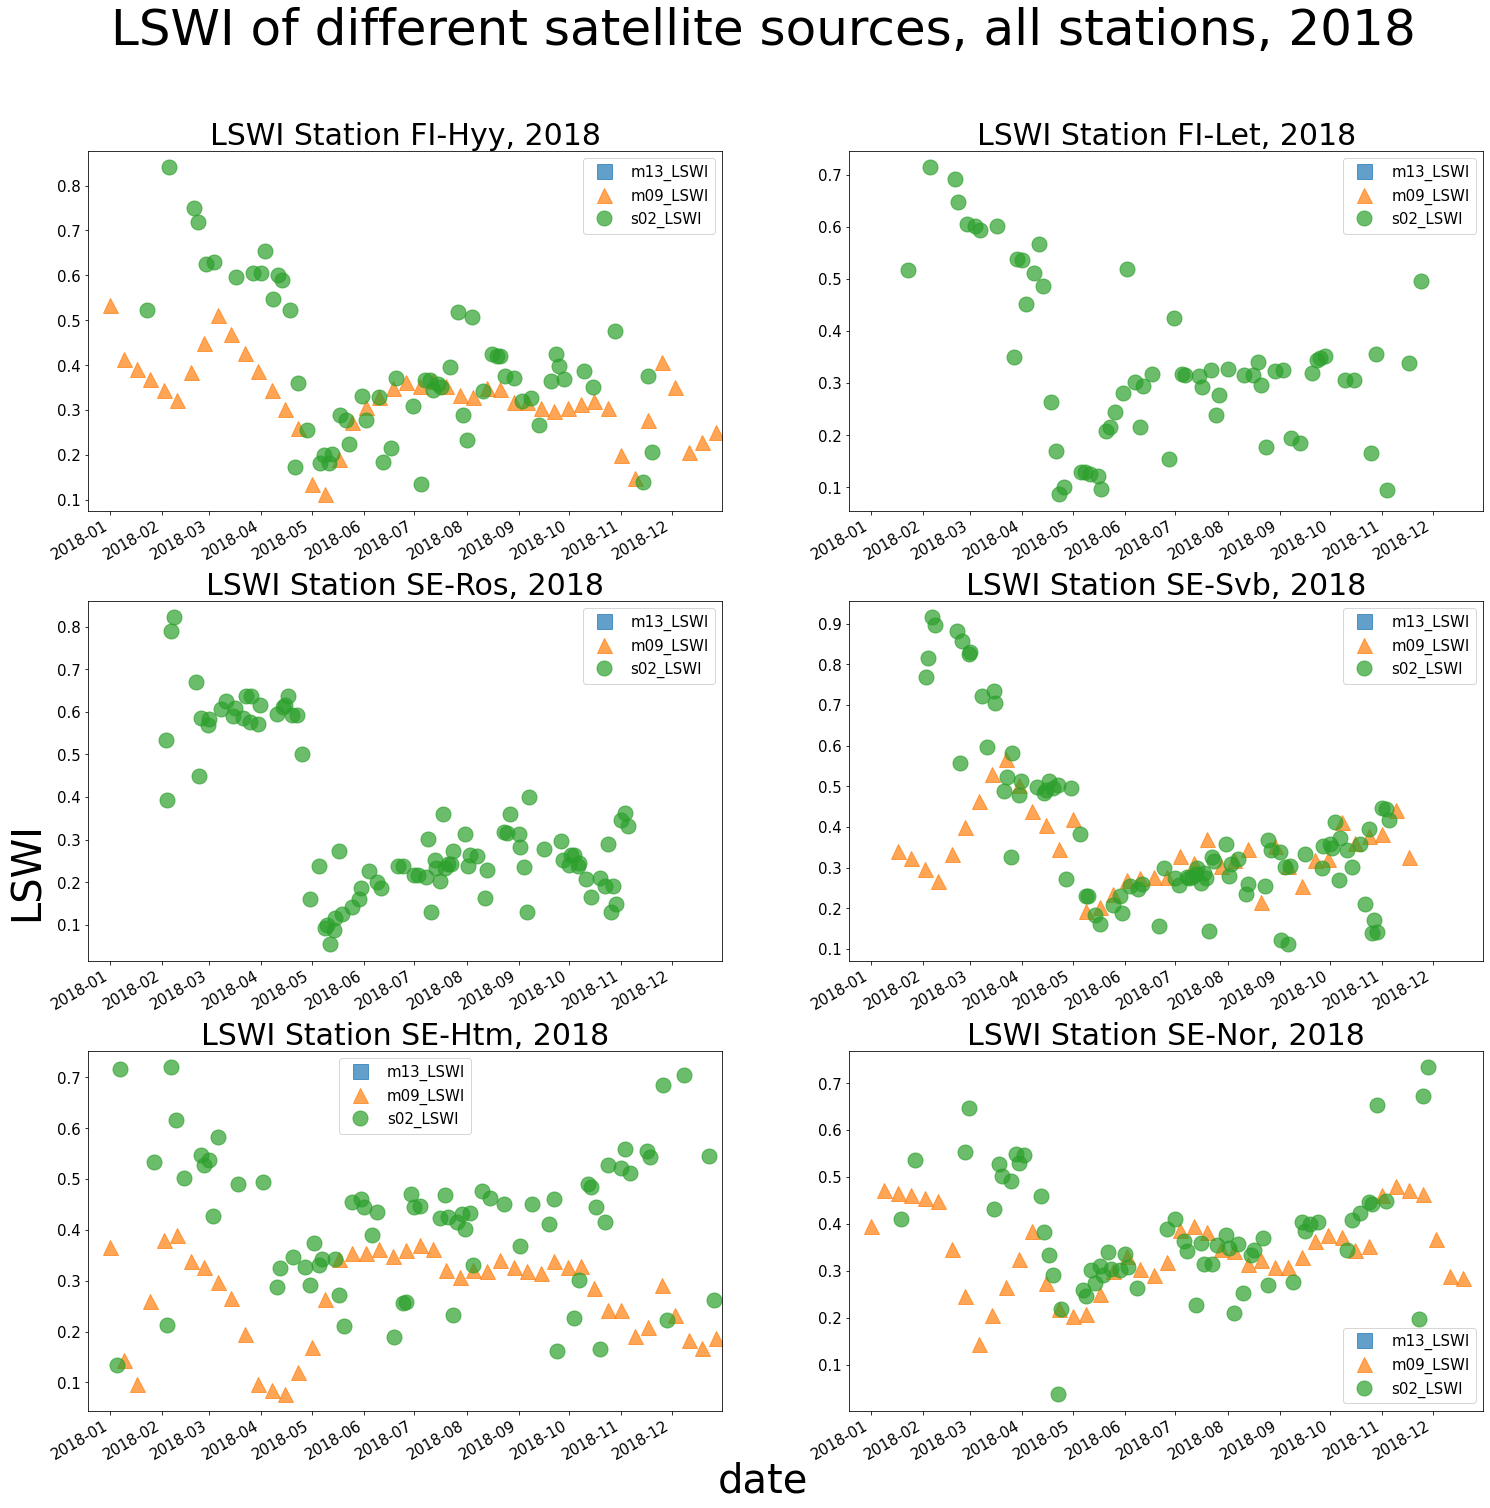

In [88]:
counts = pd.DataFrame(columns = list_stations) 

fig, axes = plt.subplots(int(len(list_stations)/2), 2, figsize = (25,25))#, sharex=True, sharey=True)

# df1.plot(ax=axes[0])
# df2.plot(ax=axes[0,1])

for i, ax in enumerate(axes.flat):
    m09 = df_old_lswi[list_stations[i]+'_LSWI']
    m09 = m09.dropna()
    s02 = df_sen_lswi[['LSWI_'+list_stations[i], 'Date_'+list_stations[i]]]
    s02 = s02[pd.notnull(s02)]
    s02.set_index('Date_'+list_stations[i], inplace = True)
    s02.index = pd.to_datetime(s02.index)
    s02 = s02.dropna()
    m13 = modis13_lswi[station]
    m13.index = pd.to_datetime(m13.index)
    c = pd.DataFrame(m13).join([pd.DataFrame(m09), pd.DataFrame(s02)], how='outer')
    c.columns = ["m13_LSWI","m09_LSWI","s02_LSWI"]
    
    
    d = c.count()
    counts[list_stations[i]] = d    # print(c.index)
    
    c.plot(style=['s','^','o'],alpha = 0.7, ax = ax, ms = 15, xlim = ('2017-12-19', '2018-12-31'))
    
    ax.legend(fontsize = 15)

    ax.set_title(f'LSWI Station {list_stations[i]}, 2018', fontsize=30 )
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
    
    ax.tick_params(labelsize = 15)

    # plt.setp(ax.get_xticklabels(), fontsize=12)
# # common axis labels
fig.supxlabel('date', fontsize = 40, x = 0.5, y=0.15)
fig.supylabel('LSWI', fontsize = 40, x = 0.08, y=0.5)

# # set labels
# plt.setp(axs[0:2], xlabel='x axis label')
# plt.setp(axs[3:5], ylabel='y axis label')
    
fig.subplots_adjust(top=0.9, hspace=0.25)
fig.suptitle("LSWI of different satellite sources, all stations, 2018", fontsize=50)
    

In [74]:
counts

,FI-Hyy,FI-Let,SE-Ros,SE-Svb,SE-Htm,SE-Nor
m13_LSWI,0,0,0,0,0,0
m09_LSWI,46,0,0,39,46,45
s02_LSWI,61,63,89,86,71,62


In [124]:
c['index'] = c.index

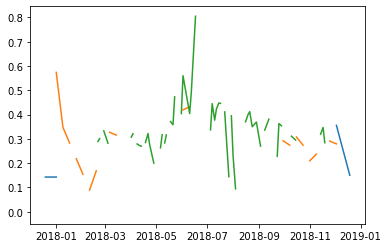

In [116]:
fig, ax = plt.subplots()
# ["m13_FI-Hyy_EVI","m09_FI-Hyy_EVI","s02_FI-Hyy_EVI"]
ax.plot(c.index,c["m13_FI-Hyy_EVI"])
ax.plot(c.index,c["m09_FI-Hyy_EVI"])
ax.plot(c.index,c["s02_FI-Hyy_EVI"])

    

<AxesSubplot:xlabel='index', ylabel='m09_FI-Hyy_EVI'>

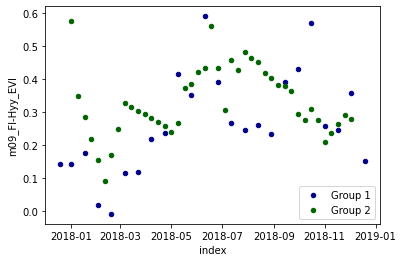

In [129]:
ax = c.plot.scatter(x='index', y="m13_FI-Hyy_EVI", color="DarkBlue", label="Group 1")
# ax1 = c.plot.scatter(x='index', y="s02_FI-Hyy_EVI", color="DarkBlue", label="Group 1")
c.plot.scatter(x='index', y="m09_FI-Hyy_EVI", color="DarkGreen", label="Group 2", ax=ax)

In [144]:
m09 = pd.DataFrame(m09)
m09['EVI_source'] = 'm09'
m09.columns = ['EVI', 'EVI_source']
m13 = pd.DataFrame(m13)
m13['EVI_source'] = 'm13'
m13.columns = ['EVI', 'EVI_source']
s02 = pd.DataFrame(s02)
s02['EVI_source'] = 's02'
s02.columns = ['EVI', 'EVI_source']

In [175]:
df = pd.concat([m09, m13, s02])
df['time'] = pd.to_datetime(df.index, format='%Y%m%d')
df['time'] = df['time'].values.astype(float)

In [176]:
df

,EVI,EVI_source,time
2018-01-01,0.573698,m09,1.514765e+18
2018-01-09,0.347522,m09,1.515456e+18
2018-01-17,0.282956,m09,1.516147e+18
2018-01-25,0.218390,m09,1.516838e+18
2018-02-02,0.153825,m09,1.517530e+18
...,...,...,...
2018-10-15,0.295000,s02,1.539562e+18
2018-10-28,0.336000,s02,1.540685e+18
2018-11-14,0.319000,s02,1.542154e+18
2018-11-17,0.347000,s02,1.542413e+18


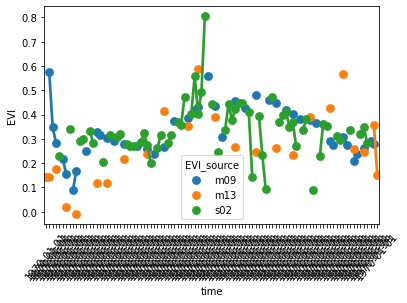

In [190]:
# sns.lmplot(x='time', y='EVI', hue= 'EVI_source', data=df)#, lowess=True)

# sns.lineplot(x='time', y='EVI', hue= 'EVI_source', data=df, markers=True, dashes=False)
sns.pointplot(x='time', y='EVI', hue= 'EVI_source', data=df)#, lowess=True)

# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
ax.set_xticklabels([pd.to_datetime(tm).strftime('%Y-%m-%d') for tm in xticks],
 rotation=50)

plt.show()

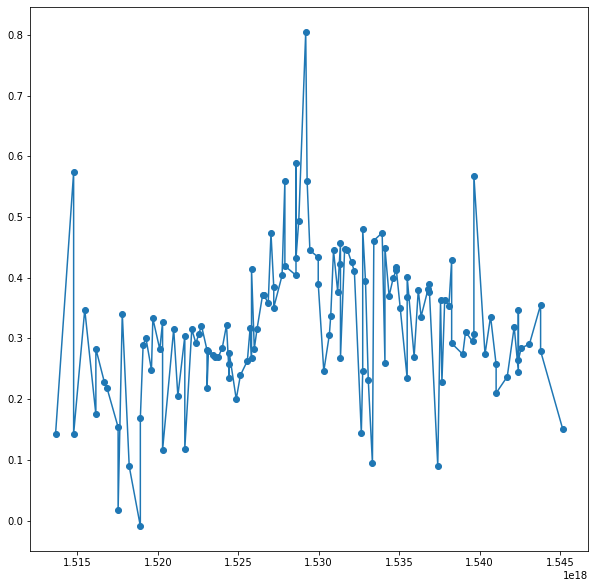

In [180]:
data = {'X': df.time.values, 'Y':df.EVI.values, 'NumberOfPlanets':df.EVI_source.values}
cts = pd.DataFrame(data=data)
cts = cts.sort_values('X')

plt.figure(figsize=(10,10))
plt.scatter(cts['X'], cts['Y'], zorder=1)
plt.plot(cts['X'], cts['Y'], zorder=2)
plt.show()

In [160]:
df['EVI_source'] = df['EVI_source'].astype('category')
df.EVI_source


2018-01-01    m09
2018-01-09    m09
2018-01-17    m09
2018-01-25    m09
2018-02-02    m09
             ... 
2018-10-15    s02
2018-10-28    s02
2018-11-14    s02
2018-11-17    s02
2018-11-19    s02
Name: EVI_source, Length: 128, dtype: category
Categories (3, object): ['m09', 'm13', 's02']

## Plot LSWI